In [2]:
import sys
sys.path.append(r'../scripts')

In [3]:
import sys
sys.path.append(r'..\scripts')

In [4]:
import pandas as pd 
import numpy as np

import preprocessing
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plt
import pickle

importlib.reload(preprocessing)

<module 'preprocessing' from 'd:\\Documents\\arrangement\\project_cars_prediction\\notebooks\\../scripts\\preprocessing.py'>

In [5]:
data = pd.read_csv(r'../datas/raw_data/car_price_prediction.csv')

In [6]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
data['Airbags'].unique()

array([12,  8,  2,  0,  4,  6, 10,  3,  1, 16,  5,  7,  9, 11, 14, 15, 13])

In [8]:
df = pd.read_csv("../datas/raw_data/car_price_prediction.csv")

mapping = (
    df.groupby("Manufacturer")["Model"]
    .unique()
    .apply(list)
    .to_dict()
)

with open("../models/manufacturer_model_map.pkl", "wb") as f:
    pickle.dump(mapping, f)

print("Mapping saved successfully")

Mapping saved successfully


In [9]:
data = preprocessing.preprocessing_pipline(data)

preprocessing started...
initial shape : (19237, 18)
After dropping dublicates : (18924, 18)
Replacing categorical values...
fix all columns data type...
After cleaning outlairs : (16037, 18)
Doing columns transformation...
Feature engineering...
Filtering data by importand manufacturer...
After filtering shape : (15867, 22)
Dropping columns...


d:\Documents\arrangement\project_cars_prediction\notebooks\../scripts\preprocessing.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace('-',0 , inplace= True)


In [10]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Levy_logp1,Engine_volume_logp1,Mileage_logp1,Age
0,13328,1399,LEXUS,RX 450,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,7.244228,1.504077,12.133534,16
1,16621,1018,CHEVROLET,Equinox,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,6.926577,1.386294,12.165256,15
2,8467,0,HONDA,FIT,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,0.000000,0.832909,12.206078,20
3,3607,862,FORD,Escape,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,6.760415,1.252763,12.037459,15
4,11726,446,HONDA,FIT,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,6.102559,0.832909,11.428478,12


In [11]:
df= data.copy()

In [12]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Levy_logp1,Engine_volume_logp1,Mileage_logp1,Age
0,13328,1399,LEXUS,RX 450,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,7.244228,1.504077,12.133534,16
1,16621,1018,CHEVROLET,Equinox,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,6.926577,1.386294,12.165256,15
2,8467,0,HONDA,FIT,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,0.000000,0.832909,12.206078,20
3,3607,862,FORD,Escape,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,6.760415,1.252763,12.037459,15
4,11726,446,HONDA,FIT,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,6.102559,0.832909,11.428478,12


In [13]:
df.select_dtypes(include="string").describe()

,Manufacturer,Model,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color
count,15867,15867,15867,15867,15867,15867,15867,15867
unique,36,1246,11,7,4,3,2,16
top,TOYOTA,Prius,Sedan,Petrol,Automatic,Front,Left wheel,Black
freq,3223,988,7424,8036,11142,11449,14507,3901


---

# One Hot Encoding
## by sklearn
---

In [14]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore')

In [15]:
columns_one_hot_encoding =['Gear box type' , 'Drive wheels' , 'Wheel' ,'Fuel type']

encodinglist = onehotencoder.fit_transform(df[columns_one_hot_encoding])
encodinglist

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(15867, 16))

In [16]:
one_hot_getname = onehotencoder.get_feature_names_out(columns_one_hot_encoding)
one_hot_getname

array(['Gear box type_Automatic', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_4x4', 'Drive wheels_Front', 'Drive wheels_Rear',
       'Wheel_Left wheel', 'Wheel_Right-hand drive', 'Fuel type_CNG',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen',
       'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid'],
      dtype=object)

In [17]:
encodingldf = pd.DataFrame(encodinglist , columns=onehotencoder.get_feature_names_out(columns_one_hot_encoding) , index=df.index)
encodingldf

,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19233,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19234,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19235,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df = pd.concat([df,encodingldf] , axis=1)

In [19]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
0,13328,1399,LEXUS,RX 450,Jeep,1,Hybrid,3.5,186005,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,16621,1018,CHEVROLET,Equinox,Jeep,0,Petrol,3.0,192000,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8467,0,HONDA,FIT,Hatchback,0,Petrol,1.3,200000,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3607,862,FORD,Escape,Jeep,1,Hybrid,2.5,168966,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11726,446,HONDA,FIT,Hatchback,1,Petrol,1.3,91901,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Save the encoder for future use
with open(r'../models/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(onehotencoder, f)

# Label Encoding

In [21]:
for col in df.select_dtypes(include= 'string').columns:
    print(f"{col} : {df[col].nunique()}")

Manufacturer : 36
Model : 1246
Category : 11
Fuel type : 7
Gear box type : 4
Drive wheels : 3
Wheel : 2
Color : 16


In [22]:
from sklearn.preprocessing import LabelEncoder

label_encode_columns ={}

In [23]:
for col in ['Manufacturer' , 'Model' , 'Category' ,'Color']:
    labelencode = LabelEncoder()
    df[col] = labelencode.fit_transform(df[col])
    label_encode_columns[col] = labelencode

In [24]:
label_encode_columns

{'Manufacturer': LabelEncoder(),
 'Model': LabelEncoder(),
 'Category': LabelEncoder(),
 'Color': LabelEncoder()}

In [25]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
0,13328,1399,17,982,4,1,Hybrid,3.5,186005,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,16621,1018,3,530,4,0,Petrol,3.0,192000,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8467,0,10,552,3,0,Petrol,1.3,200000,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3607,862,9,532,4,1,Hybrid,2.5,168966,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11726,446,10,552,3,1,Petrol,1.3,91901,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Save the label encoders for future use
with open(r'../models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encode_columns, f)

In [27]:
x = df.drop(columns=['Price'])
y = df["Price"]

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(x , y , test_size=.15 , random_state=42)


In [29]:
print(f"train set : {len(x_train)} samples")
print(f"Test set : {len(x_test)} samples")


train set : 13486 samples
Test set : 2381 samples


In [30]:
df.iloc[:5 , :20]

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Levy_logp1,Engine_volume_logp1,Mileage_logp1,Age,Gear box type_Automatic
0,13328,1399,17,982,4,1,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,12,12,7.244228,1.504077,12.133534,16,1.0
1,16621,1018,3,530,4,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,1,8,6.926577,1.386294,12.165256,15,0.0
2,8467,0,10,552,3,0,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,1,2,0.000000,0.832909,12.206078,20,0.0
3,3607,862,9,532,4,1,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,14,0,6.760415,1.252763,12.037459,15,1.0
4,11726,446,10,552,3,1,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,12,4,6.102559,0.832909,11.428478,12,1.0


In [31]:
numerical_columns = ['Levy','Engine volume', 'Mileage' , 'Age']
numerical_columns

['Levy', 'Engine volume', 'Mileage', 'Age']

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [33]:
x_train.iloc[:,:20]

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Levy_logp1,Engine_volume_logp1,Mileage_logp1,Age,Gear box type_Automatic,Gear box type_Manual
14998,0.407987,3,789,9,1,Diesel,-0.229541,-0.386833,4.0,Automatic,Front,Left wheel,14,4,6.641182,1.098612,11.513625,-0.799777,1.0,0.0
11381,0.438620,3,358,4,1,Diesel,0.104161,0.212422,4.0,Automatic,Front,Left wheel,1,4,6.659294,1.163151,11.905488,-0.018976,1.0,0.0
13864,-1.265864,22,897,4,1,LPG,1.939524,-0.312798,6.0,Automatic,4x4,Left wheel,5,2,0.000000,1.458615,11.571204,2.323429,1.0,0.0
5874,0.237320,11,508,9,1,Petrol,-0.896945,-0.541980,4.0,Automatic,Front,Left wheel,7,4,6.533789,0.955511,11.381004,0.176225,1.0,0.0
18887,-1.265864,11,508,9,1,Petrol,-0.563243,-0.018208,4.0,Tiptronic,Front,Left wheel,7,6,0.000000,1.029619,11.772216,-0.604577,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0.062277,32,337,9,1,Hybrid,0.604715,-1.142245,4.0,Automatic,Front,Left wheel,1,12,6.410175,1.252763,10.585397,-1.580579,1.0,0.0
6509,-1.265864,26,456,4,0,Petrol,-0.896945,-1.149136,4.0,Manual,Front,Left wheel,7,4,0.000000,0.955511,10.571343,-1.190178,0.0,1.0
1025,-0.537246,9,605,9,1,Hybrid,-0.229541,-0.081957,4.0,Automatic,Front,Left wheel,14,0,5.811141,1.098612,11.732013,-0.604577,1.0,0.0
19150,0.552398,11,1040,9,1,Hybrid,0.437864,1.164511,4.0,Automatic,Front,Left wheel,7,0,6.723832,1.223775,12.320963,-0.018976,1.0,0.0


In [34]:
# Save the scaler
with open(r'../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [35]:
x_train_lr_1 = x_train.drop(columns=['Fuel type' ,'Gear box type' ,'Drive wheels' ,'Wheel' , 'Levy_logp1', 'Engine_volume_logp1', 'Mileage_logp1'])

x_test_lr_1 = x_test.drop(columns=['Fuel type' ,'Gear box type' ,'Drive wheels' ,'Wheel' , 'Levy_logp1', 'Engine_volume_logp1', 'Mileage_logp1'])

In [36]:
x_train_lr_1

,Levy,Manufacturer,Model,Category,Leather interior,Engine volume,Mileage,Cylinders,Color,Airbags,...,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
14998,0.407987,3,789,9,1,-0.229541,-0.386833,4.0,14,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11381,0.438620,3,358,4,1,0.104161,0.212422,4.0,1,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13864,-1.265864,22,897,4,1,1.939524,-0.312798,6.0,5,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5874,0.237320,11,508,9,1,-0.896945,-0.541980,4.0,7,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18887,-1.265864,11,508,9,1,-0.563243,-0.018208,4.0,7,6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0.062277,32,337,9,1,0.604715,-1.142245,4.0,1,12,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6509,-1.265864,26,456,4,0,-0.896945,-1.149136,4.0,7,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1025,-0.537246,9,605,9,1,-0.229541,-0.081957,4.0,14,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19150,0.552398,11,1040,9,1,0.437864,1.164511,4.0,7,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
y_train

14998    23703
11381    13799
13864    13172
5874     14834
18887    18817
         ...  
16275      251
6509     37006
1025      4861
19150     3450
8779     10000
Name: Price, Length: 13486, dtype: int64

In [38]:
df.loc[2839]

Price                             8467
Levy                               658
Manufacturer                        10
Model                              695
Category                             3
Leather interior                     0
Fuel type                       Hybrid
Engine volume                      1.3
Mileage                         155000
Cylinders                          4.0
Gear box type                Tiptronic
Drive wheels                     Front
Wheel                       Left wheel
Color                               12
Airbags                              8
Levy_logp1                    6.490724
Engine_volume_logp1           0.832909
Mileage_logp1                11.951187
Age                                 17
Gear box type_Automatic            0.0
Gear box type_Manual               0.0
Gear box type_Tiptronic            1.0
Gear box type_Variator             0.0
Drive wheels_4x4                   0.0
Drive wheels_Front                 1.0
Drive wheels_Rear        

In [39]:
x_test_lr_1

,Levy,Manufacturer,Model,Category,Leather interior,Engine volume,Mileage,Cylinders,Color,Airbags,...,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
2839,0.173867,10,695,3,0,-1.397499,0.298851,4.0,12,8,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13910,-0.403776,32,337,9,1,0.604715,-0.196560,4.0,7,12,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6391,0.011952,32,398,9,1,-0.563243,-0.568693,4.0,11,12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13235,0.959374,11,1130,4,1,-0.229541,-0.446974,4.0,12,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4898,-1.265864,30,691,9,0,-1.063796,0.735744,4.0,14,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11492,0.648672,21,821,3,0,-1.898052,-0.249000,3.0,5,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8780,0.867476,35,1222,4,1,1.772672,-0.319040,6.0,14,10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6495,-1.265864,22,190,9,0,0.604715,-0.287833,4.0,12,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5123,-1.265864,19,1168,6,0,0.104161,2.108835,4.0,14,2,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
y_test

2839      8467
13910      706
6391     15053
13235    45542
4898      7056
         ...  
11492     7213
8780     21326
6495     25089
5123     23521
15826    10976
Name: Price, Length: 2381, dtype: int64

## Random Forset Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train_lr_1,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
from sklearn.metrics import mean_squared_error , root_mean_squared_error ,r2_score

y_pred = rf.predict(x_test_lr_1)
mse = mean_squared_error(y_test  ,y_pred)
rmse = root_mean_squared_error(y_test  ,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'MSE error : {mse}')
print(f'EMSE : {rmse}')
print(f'R2 score : {r2}')

MSE error : 27347708.21335974
EMSE : 5229.503629730048
R2 score : 0.7874275275436781


In [ ]:
# x_train_lr_1

,Levy,Manufacturer,Model,Category,Leather interior,Engine volume,Mileage,Cylinders,Color,Airbags,...,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
14998,0.407987,3,789,9,1,-0.229541,-0.386833,4.0,14,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11381,0.438620,3,358,4,1,0.104161,0.212422,4.0,1,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13864,-1.265864,22,897,4,1,1.939524,-0.312798,6.0,5,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5874,0.237320,11,508,9,1,-0.896945,-0.541980,4.0,7,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18887,-1.265864,11,508,9,1,-0.563243,-0.018208,4.0,7,6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0.062277,32,337,9,1,0.604715,-1.142245,4.0,1,12,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6509,-1.265864,26,456,4,0,-0.896945,-1.149136,4.0,7,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1025,-0.537246,9,605,9,1,-0.229541,-0.081957,4.0,14,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19150,0.552398,11,1040,9,1,0.437864,1.164511,4.0,7,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# with open(r'../models/xtrain.pkl', 'wb') as f:
#     pickle.dump(x_train_lr_1, f)

In [ ]:
# y_train

14998    23703
11381    13799
13864    13172
5874     14834
18887    18817
         ...  
16275      251
6509     37006
1025      4861
19150     3450
8779     10000
Name: Price, Length: 13486, dtype: int64

In [ ]:
# with open(r'../models/ytrain.pkl', 'wb') as f:
#     pickle.dump(y_train, f)

In [ ]:
# x_test_lr_1

,Levy,Manufacturer,Model,Category,Leather interior,Engine volume,Mileage,Cylinders,Color,Airbags,...,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
2839,0.173867,10,695,3,0,-1.397499,0.298851,4.0,12,8,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13910,-0.403776,32,337,9,1,0.604715,-0.196560,4.0,7,12,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6391,0.011952,32,398,9,1,-0.563243,-0.568693,4.0,11,12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13235,0.959374,11,1130,4,1,-0.229541,-0.446974,4.0,12,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4898,-1.265864,30,691,9,0,-1.063796,0.735744,4.0,14,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11492,0.648672,21,821,3,0,-1.898052,-0.249000,3.0,5,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8780,0.867476,35,1222,4,1,1.772672,-0.319040,6.0,14,10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6495,-1.265864,22,190,9,0,0.604715,-0.287833,4.0,12,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5123,-1.265864,19,1168,6,0,0.104161,2.108835,4.0,14,2,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# with open(r'../models/xtest.pkl', 'wb') as f:
#     pickle.dump(x_test_lr_1, f)

In [ ]:
# y_test

2839      8467
13910      706
6391     15053
13235    45542
4898      7056
         ...  
11492     7213
8780     21326
6495     25089
5123     23521
15826    10976
Name: Price, Length: 2381, dtype: int64

In [ ]:
# with open(r'../models/ytest.pkl', 'wb') as f:
#     pickle.dump(y_test, f)

In [ ]:
# y_pred

array([ 9599.6 ,   706.  , 25432.08, ..., 23988.24, 21658.59, 19526.98],
      shape=(2381,))

In [ ]:
# with open(r'../models/ypred.pkl', 'wb') as f:
#     pickle.dump(y_pred, f)

In [ ]:
# # Save the label encoders for future use
# with open(r'../models/model.pkl', 'wb') as f:
#     pickle.dump(rf, f)

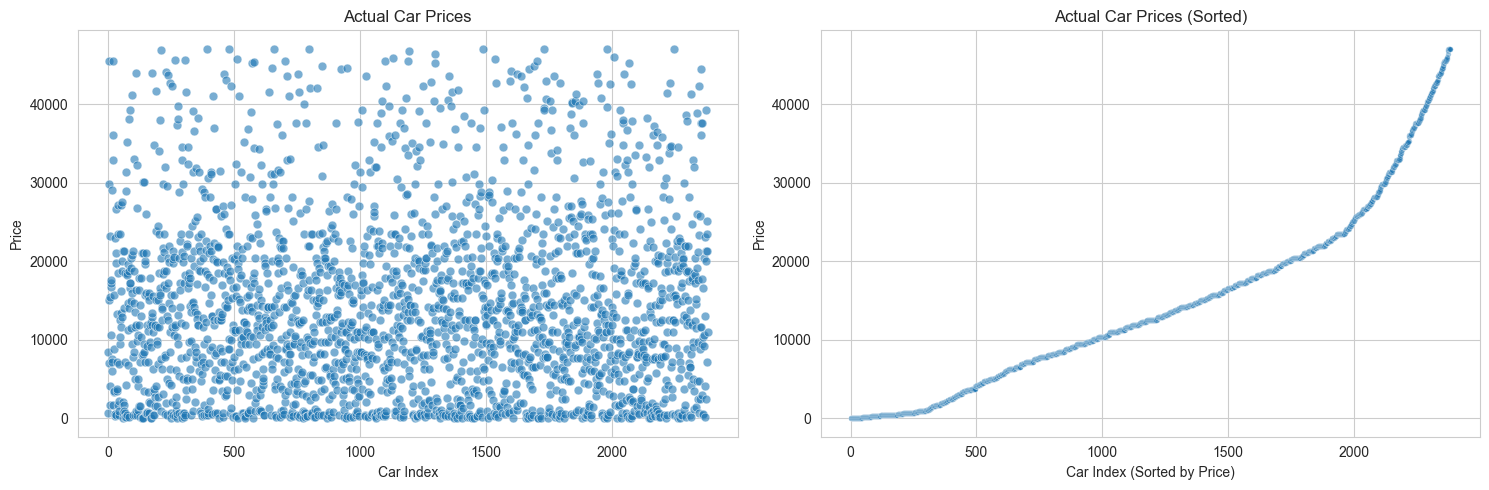

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# البيانات
y_test_array = np.array(y_test)

# ترتيب الأسعار تصاعدي
sorted_index = np.argsort(y_test_array)
y_test_sorted = y_test_array[sorted_index]

# X لكل رسمة
x_axis_unsorted = np.arange(len(y_test_array))
x_axis_sorted = np.arange(len(y_test_sorted))

# ستايل Seaborn
sns.set_style("whitegrid")

# نعمل figure واحدة مع 2 subplot
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# الرسم الأول: الأصلي
sns.scatterplot(
    x=x_axis_unsorted,
    y=y_test_array,
    alpha=0.6,
    s=40,
    ax=ax[0]
)
ax[0].set_xlabel("Car Index")
ax[0].set_ylabel("Price")
ax[0].set_title("Actual Car Prices")

# الرسم الثاني: بعد الترتيب
sns.scatterplot(
    x=x_axis_sorted,
    y=y_test_sorted,
    alpha=0.4,
    s=15,
    ax=ax[1]
)
ax[1].set_xlabel("Car Index (Sorted by Price)")
ax[1].set_ylabel("Price")
ax[1].set_title("Actual Car Prices (Sorted)")

plt.tight_layout()
plt.show()


In [85]:
import plotly.graph_objects as go
import numpy as np

# البيانات
y_test_array = np.array(y_test)
x_axis = np.arange(len(y_test_array))

# عمل الشكل
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=x_axis,
        y=y_test_array,
        mode='markers',
        marker=dict(
            size=4,   # حجم النقاط
            opacity=0.6
        ),
        name='Actual Price'
    )
)

# تصغير الشكل كله
fig.update_layout(
    title="Actual Car Prices",
    xaxis_title="Car Index",
    yaxis_title="Price",
    template="plotly_white",
    width=650,   # عرض الشكل
    height=430   # ارتفاع الشكل
)

fig.show()


In [86]:
import plotly.graph_objects as go
import numpy as np

# تحويل y_test لـ array
y_test_array = np.array(y_test)

# ترتيب الأسعار تصاعدي
sorted_index = np.argsort(y_test_array)
y_test_sorted = y_test_array[sorted_index]

# X بعد الترتيب
x_axis = np.arange(len(y_test_sorted))

# عمل الرسم باستخدام Plotly
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=x_axis,
        y=y_test_sorted,
        mode='markers',
        marker=dict(size=6, opacity=0.2),
        name='Actual Price'
    )
)

fig.update_layout(
    title="Actual Car Prices (Sorted)",
    xaxis_title="Car Index (Sorted by Price)",
    yaxis_title="Price",
    template="plotly_white",
    width=650,
    height=430
)

fig.show()


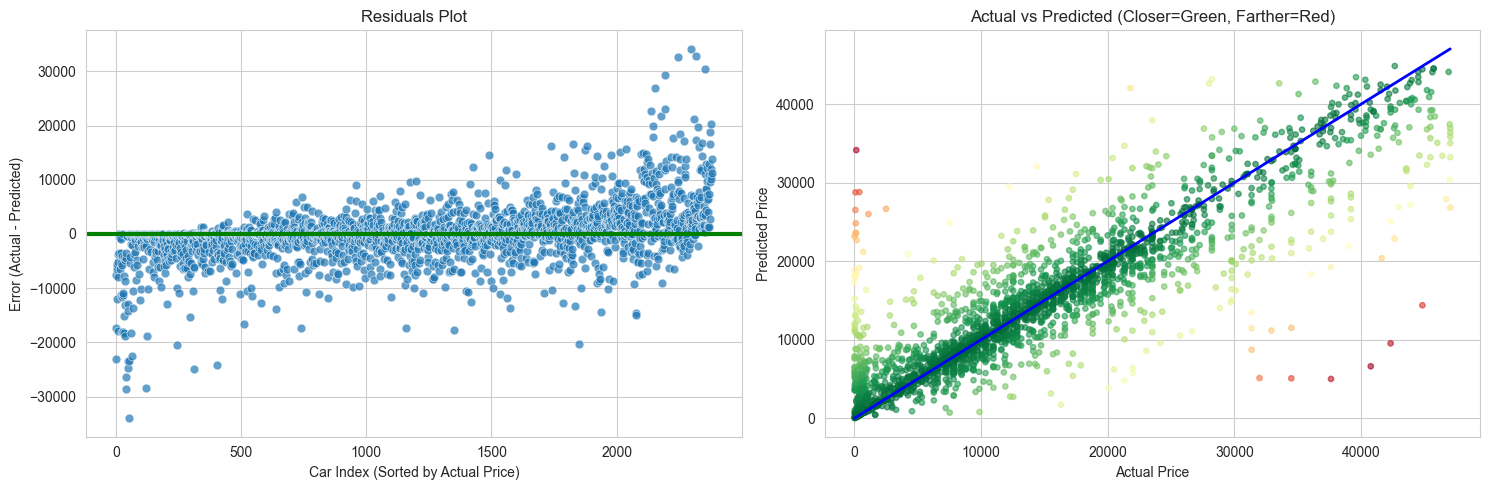

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# البيانات
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# ترتيب حسب السعر الحقيقي
sorted_index = np.argsort(y_test_array)
y_test_sorted = y_test_array[sorted_index]
y_pred_sorted = y_pred_array[sorted_index]
x_axis = np.arange(len(y_test_sorted))

# حساب residuals
residuals = y_test_sorted - y_pred_sorted

# إعداد الشكل مع 2 subplots
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# ---------------------------
# الرسم الأول: Residuals Plot
# ---------------------------
sns.scatterplot(
    x=x_axis,
    y=residuals,
    alpha=0.7,
    s=40,
    ax=ax[0]
)
ax[0].axhline(y=0, color='green', linewidth=3)
ax[0].set_xlabel("Car Index (Sorted by Actual Price)")
ax[0].set_ylabel("Error (Actual - Predicted)")
ax[0].set_title("Residuals Plot")

# ---------------------------
# الرسم الثاني: Actual vs Predicted مع تدرج اللون
# ---------------------------

# نحسب المسافة من الخط المثالي
distance_from_line = np.abs(y_test_array - y_pred_array)
norm_distance = distance_from_line / max(distance_from_line)
colors = plt.cm.RdYlGn(1 - norm_distance)  # قريب = أخضر، بعيد = أحمر

# scatter بالنقاط الملونة حسب المسافة
ax[1].scatter(y_test_array, y_pred_array, c=colors, s=15, alpha=0.6)

# الخط الأزرق: y = x
ax[1].plot([y_test_array.min(), y_test_array.max()],
           [y_test_array.min(), y_test_array.max()],
           color='blue', linewidth=2)

ax[1].set_xlabel("Actual Price")
ax[1].set_ylabel("Predicted Price")
ax[1].set_title("Actual vs Predicted (Closer=Green, Farther=Red)")

plt.tight_layout()
plt.show()


In [88]:
import plotly.graph_objects as go
import numpy as np

# البيانات
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# نحسب المسافة من الخط المثالي
distance_from_line = np.abs(y_test_array - y_pred_array)

# normalize للمسافة بين 0 و 1
norm_distance = distance_from_line / max(distance_from_line)

# نعمل اللون لكل نقطة: بعيد = أحمر، قريب = أخضر
# RGB format: نقدر نستخدم مكتبة matplotlib colormap
import matplotlib.cm as cm
colors = [f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})' 
          for r,g,b,_ in cm.RdYlGn(1 - norm_distance)]

# محور X و Y
x_axis = y_test_array
y_axis = y_pred_array

# نعمل الشكل
fig = go.Figure()

# scatter
fig.add_trace(go.Scatter(
    x=x_axis,
    y=y_axis,
    mode='markers',
    marker=dict(color=colors, size=5),
    name='Predictions'
))

# الخط المثالي
fig.add_trace(go.Scatter(
    x=[y_test_array.min(), y_test_array.max()],
    y=[y_test_array.min(), y_test_array.max()],
    mode='lines',
    line=dict(color='blue', width=3),
    name='Perfect Prediction'
))

fig.update_layout(
    title="Actual vs Predicted (Closer=Green, Farther=Red)",
    xaxis_title="Actual Price",
    yaxis_title="Predicted Price",
    template="plotly_white",
    width=900,
    height=600
)

fig.show()
